In [24]:
%matplotlib inline
import matplotlib.pyplot as plt
import scipy.stats
import numpy as np

# 概要

- 二项分布
- Poisson分布
- 正态分布

---

$$ Var(kx) = k^2 Var(x) $$

$$ Var(u \pm v) = Var(u) + Var(v) \pm 2 \times Covar(u,v) $$

# 二项分布
在概率论中，称只有两种可能结果的随机实验为Bernoulli试验。

若每次试验的结果是且只能是事件A发生或不发生这两个相互对立的结果之一，事件A出现的概率为$\pi$，不出现的概率为$1-\pi$，设X为“事件A出现的次数”，则n次独立重复试验后，事件A出现的次数X服从二项分布，记为$X \sim B(n, \pi)$：

$$ P(X = x) = \mathrm{C}_n^x (1-\pi)^{n-x} \pi^x $$

其中: $$ \mathrm{C}_n^x = \frac{n!}{x! (n-x)!} $$

### 性质与特点
- $x \in \mathbb{N}$
- X的总体均数为 $\mu = n \pi$
- X的总体方差为 $\sigma^2 = n \pi (1-\pi)$
- 经验上，当$n \pi > 5$同时$n (1 - \pi)>5$时，可近似认为对称。

### 条件
- 每次试验只有两种可能的结果
- 各次试验相互独立
- 发生成功事件的概率不变

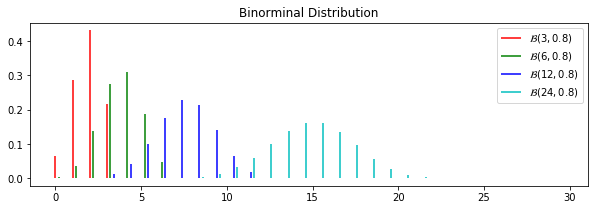

In [61]:
x = np.array(range(30))
rv_3  = scipy.stats.binom(3, 0.6)
rv_6  = scipy.stats.binom(6, 0.6)
rv_12 = scipy.stats.binom(12,0.6)
rv_24 = scipy.stats.binom(24,0.6)
plt.figure(figsize=(10,3))
plt.vlines(x, 0, rv_3.pmf(x),colors="r", label="$\mathcal{B}(3,0.8)$")
plt.vlines(x+0.2, 0, rv_6.pmf(x),colors="g", label="$\mathcal{B}(6,0.8)$")
plt.vlines(x+0.4, 0, rv_12.pmf(x),colors="b", label="$\mathcal{B}(12,0.8)$")
plt.vlines(x+0.6, 0, rv_24.pmf(x),colors="c", label="$\mathcal{B}(24,0.8)$")

plt.title("Binorminal Distribution")
plt.legend()
plt.show()

# 正态分布
$X \sim \mathcal{N}(\mu, \sigma^2)$

$$ p(x) = \frac{1}{\sigma \sqrt{2 \pi}} \exp(- \frac{(x - \mu)^2}{2 \sigma^2}) $$

### 性质与特点
- N(0,1)有被称为标准正态分布
- 标准化变换(U变换): $u = \frac{x - \mu}{\sigma}$, $u \sim \mathcal{N}(0,1)$
- 正态分布不会被线性变换所改变。

|probability|$\mu \pm n \sigma$|
|--|--|
|0.90|1.64|
|0.95|<div style="color:red">1.96</div>|
|0.99|2.58|

### 二项分布关联
当$n\pi$和$n(1-\pi)$均较大时，二项分布逼近于$\mathcal{N}(n\pi, n\pi(1-\pi))$

usu. $n\pi>5$, $n(1-\pi)>5$, $n>40$

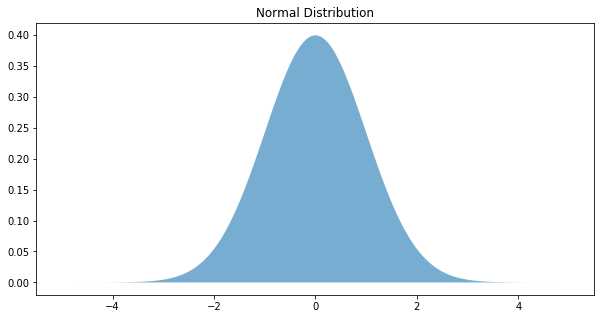

In [60]:
x = np.linspace(-5,5,500)
u = scipy.stats.norm(0,1)
plt.figure(figsize=(10,5))
plt.fill(x, u.pdf(x),alpha=0.6)
plt.title("Normal Distribution")
plt.show()

# 概念辨析

### 确定性事件 vs 随机性事件

### 随机试验 vs 随机事件
随机试验的任一个结果均称为随机事件。

### 离散型随机变量分布 vs 连续型随机变量分布

### 二项分布 vs 两点分布
n=1的二项分布称为两点分布

### 正态分布 vs 对称分布

### 实际研究中二项分布的应用与独立性要求

## 医学参考值范围的正态分布法与百分位数法
该指标正常的大多数人的范围。: 排除了影响所研究指标的疾病和有关因素的同质人群。

- 正态分布资料： $\bar{X} \pm 1.96 s$ (two tails), $\bar{X} \pm 1.645 s$ (one tail)
- 百分位数法：$P_{2.5}$ and $P_{97.5}$ (two tails), $P_{5}$ or $P_{95}$(one tail)

# 三种分布的关系

## 二项分布 与 正态分布
当$n\pi$和$n(1-\pi)$均较大时，二项分布逼近于$$\mathcal{N}(n\pi, n\pi(1-\pi))$$
usu. $n\pi>5$, $n(1-\pi)>5$, $n>40$

且样本率$P = \frac{X}{n}$近似正态分布$\mathcal{N}(\pi, \pi (1-\pi)/\pi)$

## Poisson分布 与 二项分布
当n很大，$\pi$很小时，$\mathcal{B}(n,\pi)$逼近$\mathcal{P}(n\pi)$。

## Poisson分布 与 正态分布
当均数$\mu$较大时(usu. >20)可用正态分布拟合。

# Poisson 分布
通常用来描述随机事件A在单位时间（或单位空间）内发生次数X的概率分布。记为$X \sim P(\mu)$

$$ P(X = k) = \frac{\mu^k}{k!}e^{-mu} $$

### 性质与特点
- 离散型分布
- mu为均数，也为方差。可作为是否为Poisson的依据。
- 设$X_1 \sim P(\mu_1),\; X_2 \sim P(\mu_2)$，并且$X_1$和$X_2$相互独立，则$Y = X_1 + X_2$满足$Y \sim P(\mu_1+\mu_2)$
- 当$n \to \infty$时，二项分布近似于Poisson分布。因此当n很大而pi很小时，可以用Poisson分布近似二项分布。

### 条件
- 平稳性
- 独立增量性
- 普通性

## multivariate normal distribution

$$ {\displaystyle \mathbf {X} \ \sim \ {\mathcal {N}}_{k}({\boldsymbol {\mu }},\,{\boldsymbol {\Sigma }}),}$$

$$ {\displaystyle {\boldsymbol {\mu }}=\operatorname {E} [\mathbf {X} ]=[\operatorname {E} [X_{1}],\operatorname {E} [X_{2}],\ldots ,\operatorname {E} [X_{k}]]^{\rm {T}},} $$

$$ {\displaystyle {\boldsymbol {\Sigma }}=:\operatorname {E} [(\mathbf {X} -{\boldsymbol {\mu }})(\mathbf {X} -{\boldsymbol {\mu }})^{\rm {T}}]=[\operatorname {Cov} [X_{i},X_{j}];1\leq i,j\leq k].}$$

### PDF
$${\displaystyle {\begin{aligned}f_{\mathbf {X} }(x_{1},\ldots ,x_{k})&={\frac {\exp \left(-{\frac {1}{2}}({\mathbf {x} }-{\boldsymbol {\mu }})^{\mathrm {T} }{\boldsymbol {\Sigma }}^{-1}({\mathbf {x} }-{\boldsymbol {\mu }})\right)}{\sqrt {(2\pi )^{k}|{\boldsymbol {\Sigma }}|}}}\end{aligned}}}$$

$$L(x):=\sum _{j=0}^{k}y_{j}\ell _{j}(x)$$

$$\ell _{j}(x):=\prod _{\begin{smallmatrix}0\leq m\leq k\\m\neq j\end{smallmatrix}}{\frac {x-x_{m}}{x_{j}-x_{m}}}={\frac {(x-x_{0})}{(x_{j}-x_{0})}}\cdots {\frac {(x-x_{j-1})}{(x_{j}-x_{j-1})}}{\frac {(x-x_{j+1})}{(x_{j}-x_{j+1})}}\cdots {\frac {(x-x_{k})}{(x_{j}-x_{k})}}$$